<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O sp500.csv https://lazyprogrammer.me/course_files/sp500sub.csv

--2024-07-09 17:25:26--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500.csv’

sp500.csv           100%[===================>]  24.29M   130MB/s    in 0.2s    

2024-07-09 17:25:27 (130 MB/s) - ‘sp500.csv’ saved [25473876/25473876]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('sp500.csv', index_col = 'Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,225070.000000,225070.000000,225070.000000,225070.000000,2.250700e+05,2.250700e+05
mean,73.984871,74.678526,73.272320,73.995092,1.658033e+22,5.838934e+06
std,89.102794,89.866667,88.299420,89.097396,1.305523e+24,1.311887e+07
min,0.003000,0.003000,0.001400,0.003000,-5.636207e+23,0.000000e+00
25%,31.730000,32.060287,31.389999,31.740000,2.721984e+01,1.204600e+06
50%,54.520821,55.049999,54.000000,54.560001,4.760000e+01,2.562900e+06
75%,86.165869,86.949997,85.410004,86.180000,7.667865e+01,5.600525e+06
max,1271.000000,1273.890015,1249.020020,1268.329956,1.018275e+26,5.735764e+08


In [ ]:
print(df.shape)
df.isnull().sum()

(225077, 7)


Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
Name         0
dtype: int64

In [ ]:
df.dropna(inplace=True)
# df.isnull().sum()
df.shape

(225070, 7)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name'], dtype='object')

In [ ]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


In [ ]:
goog.shape

(2263, 1)

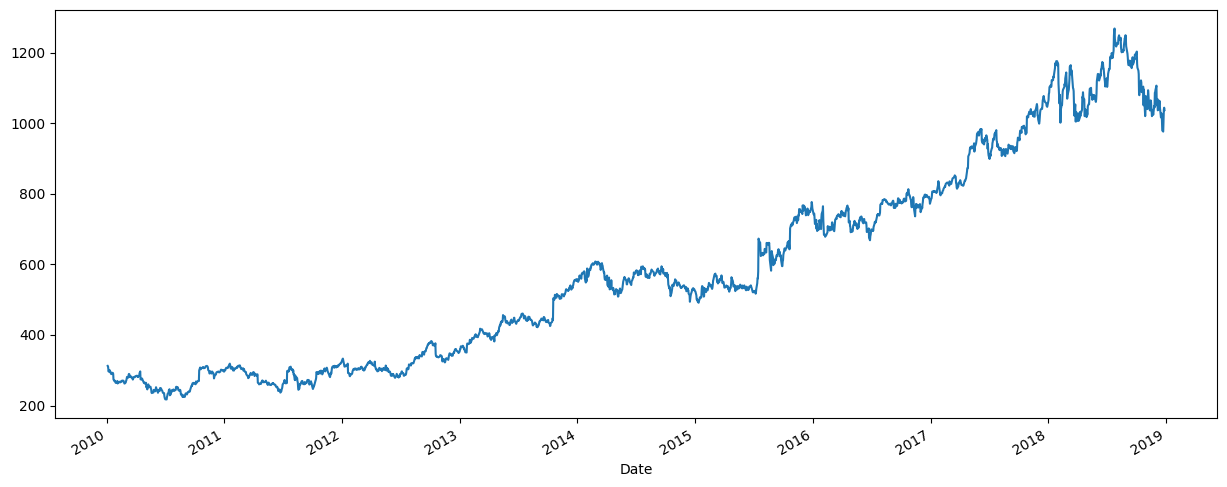

In [ ]:
goog['Close'].plot(figsize=(15,6));

<Axes: xlabel='Date'>

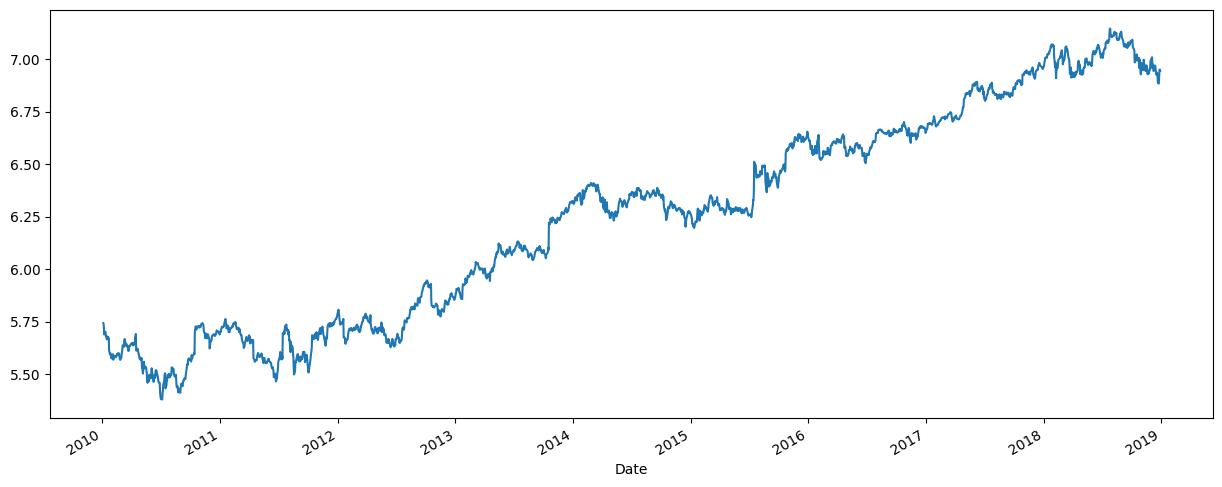

In [ ]:
goog['log_return'] = np.log(goog['Close'])
goog['log_return'].plot(figsize=(15,6))

In [ ]:
# Train test split
train_ratio = int(len(goog) * 0.8)
goog_train = goog.iloc[:train_ratio]
goog_test = goog.iloc[train_ratio:]

In [ ]:
train_idx = goog.index <= goog_train.index[-1]
test_idx = goog.index > goog_train.index[-1]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# All possible values
initialization_method = ['estimated', 'heuristic', 'legacy-heuristic']
trend = ['add', 'mul']

In [ ]:
all_possible_values = list(itertools.product(initialization_method, trend))

In [ ]:
score = float('inf')
for x in all_possible_values:
    model = ExponentialSmoothing(goog_train['Close'], trend=x[1], seasonal=None, initialization_method=x[0])
    model_fit = model.fit()
    y_pred_train = model_fit.fittedvalues
    y_pred_test = model_fit.forecast(len(goog_test))
    mse_train = mean_squared_error(goog_train['Close'], y_pred_train)
    mse_test = mean_squared_error(goog_test['Close'], y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print("Training RMSE is: ", rmse_train)
    print("Testing RMSE is: ", rmse_test)
    if rmse_test < score:
        score = rmse_test
        best_params = x

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Training RMSE is:  7.2497753190060505
Testing RMSE is:  147.38813317674555


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/py

Training RMSE is:  7.314298025421261
Testing RMSE is:  150.32792150973668
Training RMSE is:  7.309546430967935
Testing RMSE is:  82.61373380165014


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/py

Training RMSE is:  7.276495574170716
Testing RMSE is:  76.2190629472535
Training RMSE is:  7.307938135872769
Testing RMSE is:  82.61373380165014
Training RMSE is:  7.3086486727799995
Testing RMSE is:  137.07073056830708


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
best_params

('heuristic', 'mul')

In [ ]:
best_model = ExponentialSmoothing(goog_train['Close'], trend=best_params[1], seasonal=None, initialization_method=best_params[0])
res = best_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
res.forecast(len(goog_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1810     846.259719
1811     846.980073
1812     847.701040
1813     848.422621
1814     849.144815
           ...     
2258    1238.939393
2259    1239.994004
2260    1241.049513
2261    1242.105920
2262    1243.163226
Length: 453, dtype: float64

In [ ]:
train_rmse = np.sqrt(mean_squared_error(goog_train['Close'], res.fittedvalues))
test_rmse = np.sqrt(mean_squared_error(goog_test['Close'], res.forecast(len(goog_test))))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print("Training RMSE is: ", train_rmse)
print("Testing RMSE is: ", test_rmse)

Training RMSE is:  7.276495574170716
Testing RMSE is:  76.2190629472535


In [ ]:
# How the r2 score in this case
r2_score(goog_test['Close'], res.forecast(len(goog_test)))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


0.4810108413080475

In [ ]:
goog.loc[train_idx, 'forecastTrain'] = res.fittedvalues
goog.loc[test_idx, 'forecastTest'] = res.forecast(len(goog_test)).to_numpy()
# res.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
goog.tail()

,Close,log_return,forecastTrain,forecastTest
Date,,,,
2018-12-21,979.539978,6.887083,NaN,1238.939393
2018-12-24,976.219971,6.883688,NaN,1239.994004
2018-12-26,1039.459961,6.946457,NaN,1241.049513
2018-12-27,1043.880005,6.950700,NaN,1242.105920
2018-12-28,1037.079956,6.944164,NaN,1243.163226


<Axes: xlabel='Date'>

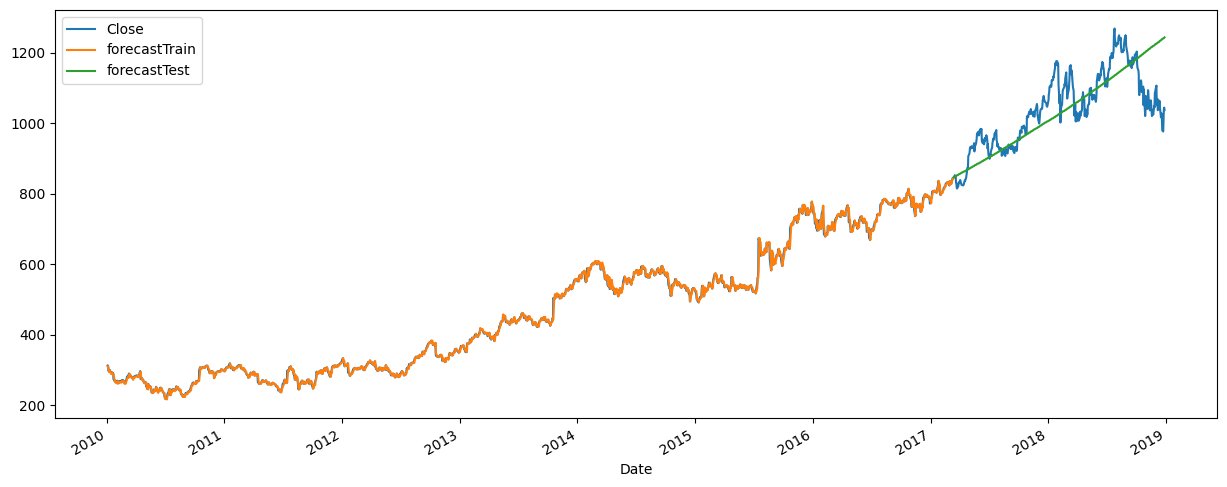

In [ ]:
goog[['Close','forecastTrain', 'forecastTest']].plot(figsize=(15,6))

<Axes: xlabel='Date'>

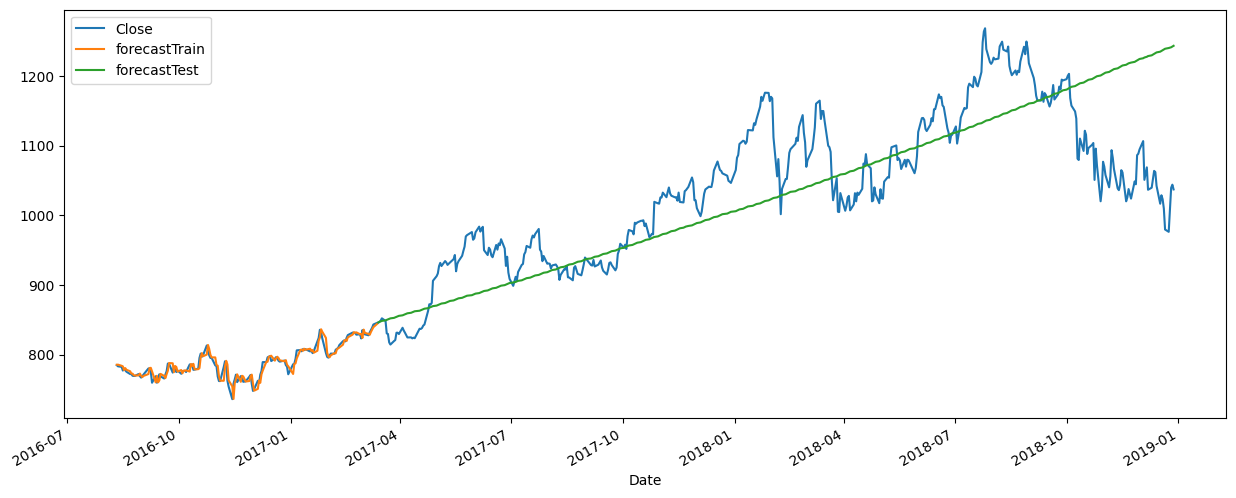

In [ ]:
goog.iloc[-600:][['Close','forecastTrain', 'forecastTest']].plot(figsize=(15,6))